#17-1. 들어가며
NLP 기술의 발전과 framework


---


지난 시간까지 우리는 최근 빠르게 발전하고 있는 다양한 Modern NLP의 논문과 모델들을 살펴보았습니다.

이 모든 모델들을 직접 짜보는 것이 실력 향상에 도움이 되지만, 매번 새로운 논문들을 직접 구현할 수는 없겠죠. 설령 구현해 본다 하더라도 각각의 모델들이 최고의 성능을 내기 위해서는 엄청나게 많은 컴퓨팅 자원을 동원한 pre-training 작업을 필요로 합니다.

또한, 논문과 함께 공개된 리서치코드를 이용하여 모델을 내가 가진 데이터셋과 문제에 적용할 수는 있지만, 매번 프로젝트마다 다른 코드스타일과, 다른 framework(tensorflow, pytorch 등)을 사용하기 때문에 많은 모델들을 분석해서 구조를 파악한 후 직접 돌려보고 이를 적용하기란 쉽지 않을 것입니다.

이런 고민들을 모두 한꺼번에 해결해줄 수 있는 게 바로 NLP Framework입니다!!

소프트웨어에서 framework란 프로젝트의 뼈대를 이루는 클래스와 인터페이스의 집합을 말합니다. 해당 분야의 베스트 프랙티스를 반영하여 확장 가능한 템플릿 형태로 설계되었기 때문에, framework를 이용해 손쉽게 다양한 응용 프로그램을 제작할 수 있습니다. 최근 NLP 분야에선 transformer 기반의 BERT 등 다양한 pretrained model이 발표되고, 이를 활용한 전이학습(transfer learning)을 통해 다양한 NLP 태스크를 손쉽게 구현하는 흐름이 두드러지고 있습니다. 이런 NLP 분야의 베스트 프랙티스를 바탕으로 다양한 NLP 분야의 framework가 속속 발표되고 있습니다. 이러한 NLP framework들은 NLP 분야의 최신 논문들의 리서치코드를 미리 구현하여 pretrained model을 제공하고 있습니다. 그래서 framework의 사용자가 아주 손쉽게 이를 가져다가 다양한 태스크에 맞게 finetuning하거나 하여 사용할 수 있게 해 줍니다. 대부분의 NLP framework들은 태스크나 데이터셋, 모델에 무관하게 통일적인 인터페이스를 기반으로 설계된 클래스 구조를 가지고 있어서, 최소한의 코드 구현만으로도 다양한 변화에 대응할 수 있게 해주는 장점이 있습니다.

정말 다양한 framework들이 존재하고 있습니다. 어떤 멋진 NLP framework들이 있는지 간단히 살펴보겠지만, 이번 시간에 우리는 특히 Huggingface(🤗)의 transformers를 중심으로 다양한 NLP의 모델들을 다루는 방법에 대해 이야기 나눠볼까 합니다.

❗ 버전
이번 노드는 tensorflow 2.3 이상 버전을 설치해주시기 바랍니다.

오늘의 목차

---

다양한 NLP Framework의 출현

Huggingface transformers 개요

Huggingface transformers (1) Model

Huggingface transformers (2) Tokenizer

Huggingface transformers (3) Processor

Huggingface transformers (4) Config

Huggingface transformers (5) Trainer

#17-2. 다양한 NLP Framework의 출현
오늘 우리는 주로 Huggingface transformers Framework를 통해 NLP framwork가 어떤 것인지를 구체적으로 살펴볼 것입니다. 그러나 Huggingface transformers이전에도 NLP 분야에 널리 알려진 framework들이 많이 있었습니다. 지금도 널리 활용되고 있는 것들 위주로 종류별로 몇 가지를 살펴보도록 하겠습니다.

(참고) 이번 스텝의 내용은 [Top NLP Libraries to Use 2020](https://towardsdatascience.com/top-nlp-libraries-to-use-2020-4f700cdb841f)에 정리된 내용을 바탕으로 작성하였음을 밝힙니다.

General Framework for NLP

---

여기서 소개할 framework들은 NLP 문제를 가장 일반적으로 해결할 수 있는 통합적인 프레임워크를 목표로 설계된 것들입니다. 대표적으로는 AllenNLP, Fairseq, Fast.ai가 있으며, Google의 tensor2tensor 프로젝트도 같은 범주로 생각할 수 있습니다.

🔶 AllenNLP
제공자 : Allen AI Institute

Website : [https://allennlp.org/](https://allennlp.org/)

Github : https://github.com/allenai/allennlp

Backend : PyTorch

2018년 초반에 Contextual Word Embedding의 대표적인 모델인 ELMO를 발표하면서 유명해진 Allen Institute에서 만든 NLP framework입니다. 당시 ELMO는 [GLUE Benchmark Test](https://gluebenchmark.com/)와 같이 10가지나 되는 다양한 태스크로 구성된 데이터셋을 하나의 모델을 finetune하는 것만으로도 기존의 State-of-the-art 기록을 경신하는 성능을 보여주고자 하였습니다. 그랬기에 하나의 모델로 다양한 태스크를 손쉽게 처리할 수 있는 유연한 프로젝트를 구성해야 했고, 이를 확장하면서 자연스럽게 NLP framework로 발전하게 되었습니다. 이후 AllenNLP는 Glue dataset의 baseline 프로젝트 [Starting Baseline](https://github.com/nyu-mll/GLUE-baselines)를 제공하기도 했습니다.

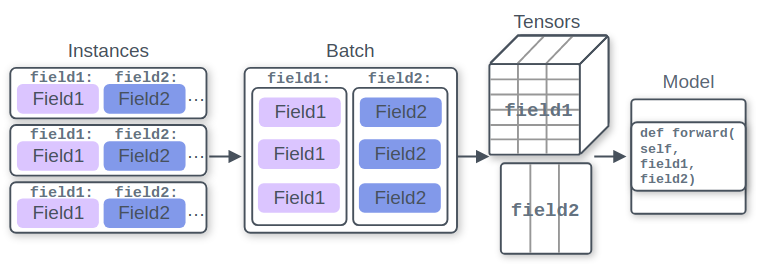

[출처 : AllenNLP Guide(https://guide.allennlp.org/building-your-model#1)]
태스크와 모델을 분리해서, 한가지 모델로 다양한 태스크를 처리하거나 하나의 태스크를 다양한 모델로 처리할 수 있도록 하는 설계는 AllenNLP가 처음 시도한 것은 물론 아닙니다만, ELMO와 같은 pretrained model의 성공을 바탕으로 NLP framework를 완성해 나가려는 AllenNLP의 시도는 이후 많은 아이디어를 제공하였습니다. AllenNLP는 현재는 ELMO 이외에도 BERT 등 다양한 모델의 활용이 가능합니다.

단, AllenNLP는 PyTorch 기반으로 설계되었으며 모델이 torch.nn.Module을 상속받는 구조로 설계되었습니다. Tensorflow나 Keras 기반으로 AllenNLP를 활용하는 것은 어렵습니다.

🔶 Fairseq

제공자 : Facebook AI Research

Website : https://fairseq.readthedocs.io/en/latest

Github : https://github.com/pytorch/fairseq

Backend : PyTorch

Fairseq는 꾸준히 NLP 연구성과를 내고 있는 Facebook AI Research의 NLP Framework입니다. 비단 자연어처리에만 국한된 것이 아니라 이름에서도 알 수 있듯이 CNN, LSTM 등 전통적인 모델로부터, 음성인식/합성 등 sequential한 데이터를 다루는 분야를 두루 다루는 다양한 pretrained model을 함께 제공하고 있습니다. 역시 Facebook의 framework답게 PyTorch 기반으로 설계되었습니다.

🔶 Fast.ai

제공자 : fast.ai

Website : http://docs.fast.ai/

Github : https://github.com/fastai/fastai

Backend : PyTorch

fast.ai는 이름에 걸맞게, 빠르게 배우고 쉽게 모델을 구성할 수 있도록 하이레벨 API와 Application 블록까지 손쉽게 사용할 수 있도록 구성되어 있습니다. 비단 NLP 분야 뿐 아니라 다양한 분야로 확장 가능합니다. 역시 PyTorch 기반으로 설계되었습니다.

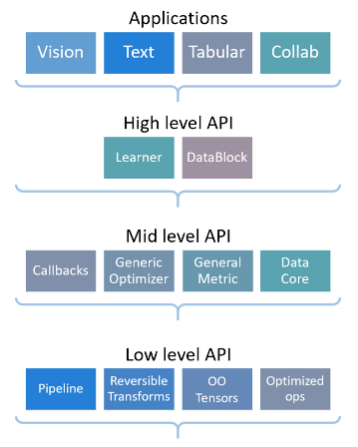

[출처 : fast.ai (https://github.com/fastai/fastai)]

🔶 tensor2tensor

제공자 : Google Brain

Github : https://github.com/tensorflow/tensor2tensor (deprecated)

New Github : https://github.com/google/trax

Backend : Tensorflow

Google Brain에서 2017년에 transformer 논문을 발표하면서 그 구현체로 함께 공유했던 프로젝트가 바로 tensor2tensor였습니다. 이 프로젝트 역시 'Attention is all you need'라는 논문의 제목처럼, transformer를 중심으로 다양한 태스크와 다양한 모델을 하나의 framework에 통합하려는 시도를 하였습니다. 이후 2019년부터 Google은 Tensorflow V2 기반으로 pretrained model의 지원을 강화한 trax라는 프로젝트를 생성하면서, 2020년도부터는 tensor2tensor의 개발을 중단하고 관련 기능을 trax로 통합이관하였습니다.

Tensorflow 기반의 NLP framework이 상대적으로 드문 가운데, Tensorflow 기반의 NLP 연구개발을 진행한다면 주목해 볼 만할 것입니다.

##Preprocessing Libraries

---

아래는 전통적으로 사용되었던 NLP 분야의 전처리 관련 framework들입니다. 위에서 소개한 framework들처럼 전처리-모델링-태스크 훈련/평가를 통합적으로 설계하여 NLP 태스크를 제너럴하게 수행하게 설계한 것이 아니라 tokenization, tagging, parsing 등 특정 전처리 작업을 위해 설계된 라이브러리에 가깝습니다. 여기에는 아래 예시로 든 Spacy, NLTK, TorchText 등이 있습니다. 한국어인 경우 KoNLPy 라이브러리도 동일한 역할을 한다고 볼 수 있겠습니다.

🔶 Spacy

Website : https://spacy.io/

Github : https://github.com/explosion/spaCy

🔶 NLTK

Website : https://www.nltk.org/

Github : https://github.com/nltk/nltk

🔶 TorchText

Website : https://torchtext.readthedocs.io/en/latest/

Github : https://github.com/pytorch/text

🔶 KoNLPy

Website : https://konlpy.org/en/latest/

Github : https://github.com/konlpy/konlpy

##Transformer-based Framework

---

🔶 Huggingface transformers

제공자 : Huggingface.co

Website : https://huggingface.co/transformers/

Github : https://github.com/huggingface/transformers

Backend : PyTorch and Tensorflow

여기에는 현재 가장 주목받고 있는 NLP Framework인 Huggingface transformers가 있습니다. 사실 Huggingface의 transformers 라이브러리의 최근 모습은 이미 아주 general한 NLP framework의 모습을 충분히 가지고 있습니다. 하지만 초기에는 BERT 등 다양한 transformer 기반의 pretrained model을 사용하기 위한 PyTorch 기반의 wrapper 형태로 시작되었습니다. 그래서 전통적인 모델까지 포괄하려고 했던 이전의 general NLP Framework 들에 비해, Huggingface의 transformers는 pretrained model 활용을 주로 지원하며, tokenizer 등 전처리 부분도 pretrained model들이 주로 사용하는 Subword tokenizer 기법에 집중되어 있는 특징이 있습니다.

이후 다음 스텝부터는 Huggingface의 transformers에 대해 집중적으로 살펴보겠습니다.

#17-3. Huggingface transformers 개요
##Why Huggingface?

---

(1) 광범위하고 신속한 NLP 모델 지원

Huggingface는 많은 사람들이 최신 NLP 모델들을 더욱 손쉽게 사용하는 것을 목표로 만들기 시작했다고 합니다. 그래서 그런지 새로운 논문들이 발표될 때마다, 본인들의 framework에 흡수시키고 있습니다. 또한, pretrained model을 제공하고, dataset과 tokenizer를 더욱 쉽게 이용할 수 있도록 framework화시키고 있는 행보도 보이고 있습니다. 다른 framework들도 이런 작업을 하지 않는 것은 아니지만, Huggingface의 지원 범위가 가장 광범위하고, 최신논문을 지원하는 속도도 빠릅니다.

(2) PyTorch와 Tensorflow 모두에서 사용 가능

transformers는 기본적으로 PyTorch를 기반으로 만들어져있습니다. 많은 utility가 PyTorch 위주로 작성이 되어있긴 하지만, 최근에는 Tensorflow로도 학습하고 사용할 수 있게끔 계속해서 framework를 확장하고 있는 중입니다. 이렇듯 Huggingface transformers를 바탕으로 Tensorflow와 PyTorch라는 Backend의 한계를 뛰어넘어 어떤 환경에든 쉽게 적용 가능한 표준 framework의 지위를 다져가고 있습니다.

(3) 잘 설계된 framework 구조

Hugging Face의 목표처럼 이 framework는 쉽고 빠르게 어떠한 환경에서도 NLP모델을 사용할 수 있도록 끊임없이 변화하고 있습니다. 이것은 또한 사용하기 쉽고 직관적일뿐더러 모델이나 태스크, 데이터셋이 달라지더라도 동일한 형태로 사용 가능하도록 잘 추상화되고 모듈화된 API 설계가 있기 때문에 가능한 것입니다.

##시작하기

---

역시 가장 먼저 해야 할 것은 프레임워크를 설치하는 것이죠! tensorflow를 사용하기 위해서 처음 설치했던 것처럼, huggingface의 Transformers도 설치해보도록 하겠습니다.
```
$ pip install transformers
```

생각보다 간단하죠? 하지만 만약 Huggingface transformers의 소스코드 구조를 보다 명확히 파악하고 싶다면 아래와 같이 적당한 위치에서 소스코드를 다운받아 설치하는 것을 권합니다.

```
$ git clone https://github.com/huggingface/transformers.git
$ cd transformers
$ pip install -e .
```
❗ transformers 설치 후 컴퓨터 재부팅을 해야합니다. 아래 명령어는 주의해서 입력하세요.

# 재부팅 명령어입니다!!!
$ sudo reboot
잘 설치되었는지 파악하기 위해서는 다음 예제를 실행해 봅시다.

In [ ]:
!pip install transformers
!git clone https://github.com/huggingface/transformers.git
!pip install -e /content/transformers/

fatal: destination path 'transformers' already exists and is not an empty directory.
Obtaining file:///content/transformers
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Found existing installation: transformers 4.6.0.dev0
    Can't uninstall 'transformers'. No files were found to uninstall.
  Running setup.py develop for transformers


잘 설치되었는지 파악하기 위해서는 다음 예제를 실행해 봅시다.

In [ ]:
from transformers import pipeline

classifier = pipeline('sentiment-analysis', framework='tf')
classifier('We are very happy to include pipeline into the transformers repository.')

All model checkpoint layers were used when initializing TFDistilBertForSequenceClassification.

All the layers of TFDistilBertForSequenceClassification were initialized from the model checkpoint at distilbert-base-uncased-finetuned-sst-2-english.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


[{'label': 'POSITIVE', 'score': 0.9978193640708923}]

##Huggingface transformers 설계구조 개요

---

framework를 사용하기 위해서는 framework가 어떻게 생겼는지 그 구조를 파악하는 것이 필요하겠죠??

NLP framework가 NLP모델을 통해 어떠한 문제를 푸는 과정이 어떻게 진행될지 생각해봅시다.

먼저, 1) Task를 정의하고 그에 맞게 dataset을 가공시킵니다. 그 이후 2) 적당한 model을 선택하고 이를 만듭니다. 3)model에 데이터들을 태워서 학습을 시키고, 이를 통해 나온 4)weight와 설정(config)들을 저장합니다. 저장한 model의 checkpoint는 5)배포하거나, evaluation을 할 때 사용하고는 하죠.

transformers는 위와 같은 흐름에 맞추어 설계되어있습니다.

task를 정의하고 dataset을 알맞게 가공하는 Processors, 텍스트 데이터를 전처리할 수 있는 Tokenizer, 다양한 model을 정의한 Model, optimizer와 학습 schedule(warm up 등)을 관리할 수 있는 Optimization, 학습 과정을 전반을 관리하는 Trainer, weight와 tokenizer, model을 쉽게 불러올 수 있도록 각종 설정을 저장하는 Config 등으로 이루어져 있습니다.

우리는 다음 스텝부터, Huggingface의 각 부분을 이루고 있는 클래스 구조에 대해 좀 더 자세히 살펴보겠습니다.

#17-4. Huggingface transformers (1) Model
transformers의 가장 핵심적인 부분은 아무래도 모델이라고 할 수 있을 것입니다.

기본적으로 모델들은 PretrainedModel 클래스를 상속받고 있습니다. PretrainedModel 클래스는 학습된 모델을 불러오고, 다운로드하고, 저장하는 등 모델 전반에 걸쳐 적용되는 메소드들을 가지고 있습니다. 이런 상속구조를 가지고 있기 때문에, 실제로 사용할 모델이 BERT이건, GPT이건 상관없이 모델을 불러오고 다운로드/저장하는 등의 작업에 활용하는 메소드는 부모 클래스의 것을 동일하게 활용할 수 있게 됩니다.

모델은 두 가지 방식으로 불러올 수 있습니다.

첫 번째로는 task에 적합한 모델을 직접 선택하여 import하고, 불러오는 방식이 있습니다. 모델을 로드할 때는 from_pretrained라는 메소드를 사용하며, Huggingface의 pretrained 모델을 불러올 수도, 직접 학습시킨 모델을 불러올 수도 있습니다.

Huggingface에서 제공하는 pretrained 모델이라면 모델의 이름을 string으로, 직접 학습시킨 모델이라면 config와 모델을 저장한 경로를 string으로 넘겨주면 됩니다.

In [ ]:
from transformers import TFBertForPreTraining
model = TFBertForPreTraining.from_pretrained('bert-base-cased')

print(model.__class__)

All model checkpoint layers were used when initializing TFBertForPreTraining.

All the layers of TFBertForPreTraining were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForPreTraining for predictions without further training.


<class 'transformers.models.bert.modeling_tf_bert.TFBertForPreTraining'>


두번째 방법은, AutoModel을 이용하는 것입니다.

모델에 관한 정보를 처음부터 명시하지 않아도 되어 조금 유용하게 사용하실 수 있습니다.

In [ ]:
from transformers import TFAutoModel
model = TFAutoModel.from_pretrained("bert-base-cased")

print(model.__class__)

Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


<class 'transformers.models.bert.modeling_tf_bert.TFBertModel'>


방금 위에서 bert-base-cased라고 언급된 부분이 보이시나요? 이것은 Model ID입니다. Huggingface가 지원하는 다양한 pretrained model이 있습니다. 이들 중 어느 것을 선택할지를 결정하기 위해 이 ID를 활용하게 됩니다.

어떤 모델이 지원되는지 아래 링크에서 확인해 볼 수 있습니다.

[Pretrained models](https://huggingface.co/transformers/pretrained_models.html)

그런데, 위에서 소개한 두가지 방법의 차이가 파악되시나요? 불러고오자 하는 모델의 ID는 bert-base-cased로서 동일합니다. 사용법도 거의 동일한데요, 결과적으로 model.__class__를 확인해 보면 약간의 차이가 있음을 알수 있습니다. 둘다 동일한 모델 파라미터를 사용하지만 Pretrain, Downstream Task 등 용도에 따라 모델의 Input이나 Output shape가 다를 수 있습니다. AutoModel을 활용한다면 모델의 상세정보를 확인할 필요 없이 Model ID만으로도 손쉽게 모델 구성이 가능하지만, 정확한 용도에 맞게 사용하려면 모델별 상세 안내페이지를 참고해서 최적의 모델을 선택하는 것이 좋습니다. 예를 들어 BERT의 상세 페이지는 아래와 같습니다.

[MODELS - BERT](https://huggingface.co/transformers/model_doc/bert.html)

모델마다 그 구조는 다르지만 대부분 해당 모델이름을 가진 클래스(eg. TFBertModel)과 MainLayer class(eg. TFBertMainLayer)와 Attention Class, Embedding Class 등으로 이루어져 있답니다. 추후에 모델이 어떻게 짜여졌는지 보실 때 __init__() 메소드 안에 구성된 뼈대를 먼저 살펴보도록 하세요 :)

#17-5. Huggingface transformers (2) Tokenizer
내가 가지고 있는 문제를 풀 모델을 정했다면, 이제 모델에 넣을 input을 만들어 줄 차례입니다.

transformers는 다양한 tokenizer를 각 모델에 맞추어 이미 구비해두었습니다. 우리가 할 일은 tokenizer를 불러와 사용하는 것 뿐이랍니다. 사용하기에 앞서서, 내가 선택한 model이 어떠한 tokenizer를 사용하는지 정도 미리 체크해두는 센스는 모두 챙겨두셨겠죠?:)

Pretrained model 기반의 NLP framework를 사용할 때 가장 중요한 두가지 클래스는 Model과 Tokenizer라고 할 수 있습니다. 그리고 두 가지는 밀접한 관련이 있습니다. 파라미터 구조가 동일한 Model이라 하더라도 Tokenizer가 다르거나 Tokenizer 내의 Dictionary가 달라지면 사실상 완전히 다른 모델이 됩니다. 그리고 Tokenizer는 어떤 언어를 다루느냐 하는 코퍼스 데이터셋에 따라서도 달라집니다.

이전 스텝에서 소개했던 Huggingface가 제공하는 모델 종류 중 몇개만 예로 들어볼까요?

bert-base-uncased : BERT 모델인데, 108MB 파라미터의 기본모델이면서, 코퍼스는 영문 대소문자 구분을 없앴다(전체 소문자화)

bert-large-cased : BERT 모델인데, 340MB 파라미터의 대형모델이면서, 코퍼스는 영문 대소문자 구분을 유지했다.
bert-base-multilingual-cased : BERT 모델인데, 108MB 파라미터의 기본모델이면서, 코퍼스는 다국어 대소문자 구분 유지했다.

tokenizer 또한 직접 명시하여 내가 사용할 것을 지정해주거나, AutoTokenizer를 사용하여 이미 구비된 model에 알맞는 tokenizer를 자동으로 불러올 수도 있습니다.
이때 유의할 점은, model을 사용할 때 명시했던 것과 동일한 ID로 tokenizer를 생성해야 한다는 점입니다.

In [ ]:
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

In [ ]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')

불러온 tokenizer를 한 번 사용해볼까요?

In [ ]:
encoded = tokenizer("This is Test for aiffel")
print(encoded)

{'input_ids': [101, 1188, 1110, 5960, 1111, 170, 11093, 1883, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1]}


이 경우는 BERT의 tokenizer이기 때문에 인코딩이 된 input_ids 뿐만 아니라, token_type_ids와 attention_mask까지 모두 생성된 input 객체를 받아볼 수 있습니다.

tokenizer는 batch 단위로 input을 받을 수 도 있습니다.

In [ ]:
batch_sentences = ["Hello I'm a single sentence",
                    "And another sentence",
                    "And the very very last one"]

encoded_batch = tokenizer(batch_sentences)
print(encoded_batch)

{'input_ids': [[101, 8667, 146, 112, 182, 170, 1423, 5650, 102], [101, 1262, 1330, 5650, 102], [101, 1262, 1103, 1304, 1304, 1314, 1141, 102]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1]]}


이 밖에도 tokenize할 때에 padding, truncation 등 다양한 옵션을 설정 할 수 있으며, 모델이 어떤 프레임워크를 사용하는가(Tensorflow 또는 PyTorch)에 따라 input 타입을 변경 시켜주는 return_tensors 인자도 있습니다.



In [ ]:
batch = tokenizer(batch_sentences, padding=True, truncation=True, return_tensors="tf")
print(batch)

{'input_ids': <tf.Tensor: shape=(3, 9), dtype=int32, numpy=
array([[ 101, 8667,  146,  112,  182,  170, 1423, 5650,  102],
       [ 101, 1262, 1330, 5650,  102,    0,    0,    0,    0],
       [ 101, 1262, 1103, 1304, 1304, 1314, 1141,  102,    0]],
      dtype=int32)>, 'token_type_ids': <tf.Tensor: shape=(3, 9), dtype=int32, numpy=
array([[0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(3, 9), dtype=int32, numpy=
array([[1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 0]], dtype=int32)>}


#17-6. Huggingface transformers (3) Processor
지금까지 가장 핵심이 되는 Model 및 Model과 데이터셋을 연결해 주는 가장 기본적인 연결 도구인 Tokenizer에 대해 알아보았습니다.

그런데, 과연 Tokenizer까지만 있으면 어떤 Task이든 Model에 넣을 수 있는 적절한 입력 형태로 변경해 줄수 있을까요?

그렇지 않습니다. 예를 들어 BERT의 pretraining만 하더라도, 모델에 들어갈 입력부분을 구성하려면

1)두개의 문장을 골라서, Next Sentemce Prediction을 위해 적절히 배치하고,

2)15%의 마스킹 포지션을 골라내기 위한 복잡한 과정을 거친 후, 심지어 그 마킹 대상도 10%, 10%의 확률로 마스킹 대신 다른 예외처리를 해주어야 하고,

3)Next Sentence Prediction을 위해 Segment Embedding을 위한 tensor를 따로 마련해야 합니다.

이 부분의 과정이 의외로 (모델을 만드는 것만큼이나) 복잡한 과정임을 경험해 보셨겠죠?

이렇게 복잡한 과정을 위해서는 Tokenizer만으로는 부족합니다. 그래서 Huggingface에서는 Processor라는 추상클래스를 하나 추가하였습니다.

아래는 Processor 중 Sequence Classification 태스크를 위한 추상클래스인 DataProcessor의 코드예제입니다.

In [ ]:
class DataProcessor:
    """sequence classification을 위해 data를 처리하는 기본 processor"""

    def get_example_from_tensor_dict(self, tensor_dict):
        """
        tensor dict에서 example을 가져오는 메소드
        """
        raise NotImplementedError()

    def get_train_examples(self, data_dir):
        """train data에서 InputExample 클래스를 가지고 있는 것들을 모으는 메소드"""
        raise NotImplementedError()

    def get_dev_examples(self, data_dir):
        """dev data(validation data)에서 InputExample 클래스를 가지고 있는 것들을 모으는 메소드"""
        raise NotImplementedError()

    def get_test_examples(self, data_dir):
        """test data에서 InputExample 클래스를 가지고 있는 것들을 모으는 메소드"""
        raise NotImplementedError()

    def get_labels(self):
        """data set에 사용되는 라벨들을 리턴하는 메소드"""
        raise NotImplementedError()

    def tfds_map(self, example):
        """
        tfds(tensorflow-datasets)에서 불러온 데이터를 DataProcessor에 알맞게 가공해주는 메소드
        """
        if len(self.get_labels()) > 1:
            example.label = self.get_labels()[int(example.label)]
        return example

    @classmethod
    def _read_tsv(cls, input_file, quotechar=None):
        """tab으로 구분된 .tsv파일을 읽어들이는 클래스 메소드"""
        with open(input_file, "r", encoding="utf-8-sig") as f:
            return list(csv.reader(f, delimiter="\t", quotechar=quotechar))

processor는 raw data를 가공하여 model에 태울 수 있는 형태를 만들어주는 작업을 해주는 클래스입니다.

Hugging face는 SQuAD, GLUE 등 가장 대표적인 NLP의 문제들에 쉽게 접근할 수 있도록 processor를 만들어 두었습니다. 만약, 내가 직접 수집한 데이터를 가공하고 싶다면, 내 데이터에 알맞은 processor를 직접 정의 해야겠죠?

Task 별 복잡한 데이터 전처리 작업을 수행하는 processor를 직접 만드실 때는, DataProcessor를 상속받아서 만들어주시면 됩니다. 내가 가지고 있는 데이터에 따라서 추가해야하는 부분이 생길 수도 있습니다. 다음 프로젝트 노드에서는 processor를 상속받아 활용하는 부분도 실습을 통해 진행해 볼 예정입니다.

❗ 주의
raise NotImplementedError()는 지워주시는 것 잊지 마세요! 추상클래스에서 꼭 구현해야 할 부분이 NotImplemented로 남아있다면 여러분이 짠 Processor는 Tokenizer와 협력하여 정상동작하지 않을 것입니다.

#17-7. Huggingface transformers (4) Config
config는 모델을 학습시키기 위한 요소들을 명시한 json파일로 되어있습니다.

이 json파일에는 batch size, learning rate, weight_decay등 train에 필요한 요소들부터 tokenizer에 특수 토큰(special token eg.\[MASK])들을 미리 설정하는 등 설정에 관한 전반적인 것들이 명시되어 있습니다.

PretrainedModel을 save_pretrained 메소드를 이용하면 모델의 체크포인트와 함께 저장되도록 되어있습니다.

hugging face의 pretrained model을 그대로 사용하게 되면 자동으로 config파일이 로드되어 명시할 필요가 없지만, 설정을 변경하고 싶거나 나만의 모델을 학습실킬 때에는 config파일을 직접 불러와야 합니다.

config 또한 model, tokenizer처럼 Model ID만 있으면 , Config 클래스를 명확히 지정하거나 혹은 AutoConfig를 이용하는 방식으로 불러올 수 있습니다. 두 방식의 결과를 비교해 보세요.

In [ ]:
from transformers import BertConfig

config = BertConfig.from_pretrained("bert-base-cased")
print(config.__class__)
print(config)

<class 'transformers.models.bert.configuration_bert.BertConfig'>
BertConfig {
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.6.0.dev0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 28996
}



In [ ]:
from transformers import AutoConfig

config = AutoConfig.from_pretrained("bert-base-cased")
print(config.__class__)
print(config)

<class 'transformers.models.bert.configuration_bert.BertConfig'>
BertConfig {
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.6.0.dev0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 28996
}



두 방식으로 불러온 config의 내용에 별다른 차이가 없다는 것을 알수 있습니다. 만약 모델을 이미 생성했다면 model.config으로 가져올 수도 있습니다.

In [ ]:
model = TFBertForPreTraining.from_pretrained('bert-base-cased')

config = model.config
print(config.__class__)
print(config)

All model checkpoint layers were used when initializing TFBertForPreTraining.

All the layers of TFBertForPreTraining were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForPreTraining for predictions without further training.


<class 'transformers.models.bert.configuration_bert.BertConfig'>
BertConfig {
  "_name_or_path": "bert-base-cased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.6.0.dev0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 28996
}



#17-8. Huggingface transformers (5) Trainer
trainer는 모델을 학습시키기 위한 클래스입니다. training, fine-tuning, evaluation 모두 trainer class를 이용하여 할 수 있습니다.

tensorflow의 경우 tf.keras.model API를 이용하여서도 Huggingface를 통해 불러온 모델을 활용해 학습이나 테스트를 진행할 수 있습니다. 그동안 많이 활용해 보았던 model.fit()이나 model.predict()를 활용하는 것이 가능합니다.

다만, TFTrainer를 이용할 경우에는 TrainingArguments 를 통해 Huggingface 프레임워크에서 제공하는 기능들을 통합적으로 커스터마이징하여 모델을 학습시킬 수 있다는 장점이 있습니다.

아래 코드는 Huggingface를 통해 불러온 모델을 tf.keras.model API를 이용해 활용하는 경우의 예시입니다.

In [ ]:
import tensorflow as tf
from transformers import TFAutoModelForPreTraining, AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')
model = TFAutoModelForPreTraining.from_pretrained('bert-base-cased')

sentence = "Hello, This is test for bert TFmodel."

input_ids = tf.constant(tokenizer.encode(sentence, add_special_tokens=True))[None, :]  # Batch size 1

optimizer = tf.keras.optimizers.Adam(learning_rate=3e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss)
pred = model.predict(input_ids)

print("=====Results=====")
print(pred)

All model checkpoint layers were used when initializing TFBertForPreTraining.

All the layers of TFBertForPreTraining were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForPreTraining for predictions without further training.


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experi

TFTrainer를 사용할 경우에는 학습에 필요한 arguments을 TFTrainingArguments을 통해서 정의해주어야 합니다. 아래는 TFTrainer를 사용하여 Huggingface 모델의 학습이 이루어지는 아주 간단한 예시입니다.

실제로 모델이 구동되어 성능을 내기 위한 프로젝트 구성은 다음 프로젝트 노드에서 다루겠지만, 이번 노드에서 살펴본 Model, Tokenizer 및 데이터셋 구성이 TFTrainingArguments를 통해서 TFTrainer에 어떻게 반영되는지 확인해 주세요.

In [ ]:
from dataclasses import dataclass, field
from enum import Enum
from typing import Dict, Optional
import tensorflow as tf
import tensorflow_datasets as tfds
from transformers import (
    TFAutoModelForSequenceClassification,
    TFTrainer,
    TFTrainingArguments,
    AutoConfig,
    AutoTokenizer,
    glue_convert_examples_to_features,
)

# TFTrainingArguments 정의
training_args = TFTrainingArguments(
    output_dir='./results',              # output이 저장될 경로
    num_train_epochs=1,              # train 시킬 총 epochs
    per_device_train_batch_size=16,  # 각 device 당 batch size
    per_device_eval_batch_size=64,   # evaluation 시에 batch size
    warmup_steps=500,                # learning rate scheduler에 따른 warmup_step 설정
    weight_decay=0.01,                 # weight decay
    logging_dir='./logs',                 # log가 저장될 경로
    do_train=True,                        # train 수행여부
    do_eval=True,                        # eval 수행여부
)

# model, tokenizer 생성
model_name_or_path = 'bert-base-uncased'
with training_args.strategy.scope():    # training_args가 영향을 미치는 model의 범위를 지정
    model = TFAutoModelForSequenceClassification.from_pretrained(
            model_name_or_path,
            from_pt=bool(".bin" in model_name_or_path),
        )
tokenizer = AutoTokenizer.from_pretrained(
        model_name_or_path,
    )

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


위와 같이 Huggingface 프레임워크 구조에 따라 Model과 Tokenizer를 간단히 생성했습니다. 여기까지는 기존에 살펴본 것과 큰 차이는 없지만 model 생성시에 training_args의 scope 안에서 진행했다는 것이 눈에 띕니다. 이 부분은 TFTrainer 사용시 결정적으로 중요합니다. 이 with 구문을 생략하면 TFTrainer에 전달하고픈 옵션이 제대로 전달되지 않아 결과적으로 모델이 오동작하게 되는 경우가 생길 수 있습니다.

In [ ]:
# 데이터셋 생성
ds, info = tfds.load('glue/mrpc', with_info=True)
train_dataset = glue_convert_examples_to_features(ds['train'], tokenizer, 128, 'mrpc')
train_dataset = train_dataset.apply(tf.data.experimental.assert_cardinality(info.splits['train'].num_examples))

# TFTrainer 생성
trainer = TFTrainer(
    model=model,                          # 학습시킬 model
    args=training_args,                  # TFTrainingArguments을 통해 설정한 arguments
    train_dataset=train_dataset,   # training dataset
)

# 학습 진행
trainer.train()

INFO:absl:Load pre-computed DatasetInfo (eg: splits, num examples,...) from GCS: glue/mrpc/1.0.0
INFO:absl:Load dataset info from /tmp/tmpou8rvyb0tfds
INFO:absl:Field info.description from disk and from code do not match. Keeping the one from code.
INFO:absl:Field info.config_name from disk and from code do not match. Keeping the one from code.
INFO:absl:Field info.config_description from disk and from code do not match. Keeping the one from code.
INFO:absl:Field info.citation from disk and from code do not match. Keeping the one from code.
INFO:absl:Field info.location from disk and from code do not match. Keeping the one from code.
INFO:absl:Generating dataset glue (/root/tensorflow_datasets/glue/mrpc/1.0.0)


INFO:absl:Downloading https://firebasestorage.googleapis.com/v0/b/mtl-sentence-representations.appspot.com/o/data%2Fmrpc_dev_ids.tsv?alt=media&token=ec5c0836-31d5-48f4-b431-7480817f1adc into /root/tensorflow_datasets/downloads/fire.goog.com_v0_b_mtl-sent-repr.apps.com_o_2FjSIMlCiqs1QSmIykr4IRPnEHjPuGwAz5i40v8K9U0Z8.tsvalt=media&token=ec5c0836-31d5-48f4-b431-7480817f1adc.tmp.ca47b6cad2b84fb19e350ecf3e54456e...
INFO:absl:Downloading https://dl.fbaipublicfiles.com/senteval/senteval_data/msr_paraphrase_test.txt into /root/tensorflow_datasets/downloads/dl.fbaip.com_sente_sente_msr_parap_test0PdekMcyqYR-w4Rx_d7OTryq0J3RlYRn4rAMajy9Mak.txt.tmp.72a1b677eba04a5f9b94faa80154bcc3...
INFO:absl:Downloading https://dl.fbaipublicfiles.com/senteval/senteval_data/msr_paraphrase_train.txt into /root/tensorflow_datasets/downloads/dl.fbaip.com_sente_sente_msr_parap_trainfGxPZuQWGBti4Tbd1YNOwQr-OqxPejJ7gcp0Al6mlSk.txt.tmp.1882d0bd0f064158b6f7b097cf791a3b...
INFO:absl:Generating split train


Shuffling and writing examples to /root/tensorflow_datasets/glue/mrpc/1.0.0.incompleteGXM0DC/glue-train.tfrecord


INFO:absl:Done writing /root/tensorflow_datasets/glue/mrpc/1.0.0.incompleteGXM0DC/glue-train.tfrecord. Shard lengths: [3668]
INFO:absl:Generating split validation


Shuffling and writing examples to /root/tensorflow_datasets/glue/mrpc/1.0.0.incompleteGXM0DC/glue-validation.tfrecord


INFO:absl:Done writing /root/tensorflow_datasets/glue/mrpc/1.0.0.incompleteGXM0DC/glue-validation.tfrecord. Shard lengths: [408]
INFO:absl:Generating split test


Shuffling and writing examples to /root/tensorflow_datasets/glue/mrpc/1.0.0.incompleteGXM0DC/glue-test.tfrecord


INFO:absl:Done writing /root/tensorflow_datasets/glue/mrpc/1.0.0.incompleteGXM0DC/glue-test.tfrecord. Shard lengths: [1725]
INFO:absl:Skipping computing stats for mode ComputeStatsMode.SKIP.
INFO:absl:Constructing tf.data.Dataset for split None, from /root/tensorflow_datasets/glue/mrpc/1.0.0


Dataset glue downloaded and prepared to /root/tensorflow_datasets/glue/mrpc/1.0.0. Subsequent calls will reuse this data.


/content/transformers/src/transformers/data/processors/glue.py:67: FutureWarning: This function will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/master/examples/pytorch/text-classification/run_glue.py
  warnings.warn(DEPRECATION_WARNING.format("function"), FutureWarning)
/content/transformers/src/transformers/data/processors/glue.py:175: FutureWarning: This processor will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/master/examples/pytorch/text-classification/run_glue.py
  warnings.warn(DEPRECATION_WARNING.format("processor"), FutureWarning)


이후 데이터셋을 생성하여, model, training_args과 함께 TFTrainer에 전달하는 것으로 학습을 위한 준비가 마무리됩니다. 이후 trainer.train()을 호출하면 실제 학습이 진행됩니다.

#17-9. 마무리하며
이렇게 Huggingface가 만든 framework인 transformers를 훑어보았습니다.

내가 어떻게 모델을 불러오고, 토크나이저를 사용하고, 데이터를 가공해야 하는구나 조금 감이 잡히셨을까요? 비단 transformers뿐만 아니라, 다른 framework를 사용하실 때에도 이처럼 framework의 전반적인 구조를 먼저 파악하신다면, 더욱 유용하게 사용하실 수 있을 거라고 자신 있게 말씀드립니다!!!!!!

이제 transformers를 이용하여 이전 시간에 배웠던 모델들의 성능과 특성을 비교해보기도 하고, 다른 사람들이 학습시킨 모델을 이용하여 더 좋은 성능을 내는 모델을 만들 수도 있겠죠?

더.나.아.가.

나만의 모델과 데이터셋을 이용하여 문제를 풀어보기도 하면 완-벽-☆ 하게 NLP의 마스터가 되실 수 있을 거예요🤗
다음 시간에 진행할 내용을 기대해 주세요~